### Importing Libraries

In [1]:
import tensorflow as tf
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
#Testing if GPU is available
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Importing Data

In [4]:
#Dataset used to train the current model is available in: https://github.com/avermilov/ArcaneFaces

#The dataset contains about 3000 images of various characters from the Netflix series Arcane

#In order to create labels to train the model, initially each image was categorized to the apropriate character_name folder
#by hand. Then the data loader provided by keras was used.
'''
In order to create
'''
#data_dir should be changed according to current data directory
data_dir = "D:Ergasies/Tefas_pose/Tamvakis CNN/Arcane_labeled/"

batch_size = 32 # setting batch size
image_size = (256, 256) #setting the image size


train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                           labels = 'inferred',
                                                           label_mode = 'int', #categorical
                                                           color_mode = 'rgb',
                                                           batch_size = batch_size,
                                                           image_size = image_size,
                                                           shuffle = True,
                                                           seed = 174,
                                                           validation_split = 0.3,
                                                           subset = 'training',
                                                           )
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                           labels = 'inferred',
                                                           label_mode = 'int', #categorical
                                                           color_mode = 'rgb',
                                                           batch_size = batch_size,
                                                           image_size = image_size,
                                                           shuffle = True,
                                                           seed = 174,
                                                           validation_split = 0.3,
                                                           subset = 'validation',
                                                           )

Found 3606 files belonging to 28 classes.
Using 2525 files for training.
Found 3606 files belonging to 28 classes.
Using 1081 files for validation.


In [5]:
#Print each class label
class_names = train_ds.class_names
print(class_names)

['Amara', 'Ambessa', 'Benzo', 'Caitlyn', 'Cassandra', 'Claggor', 'Deckard', 'Ekko', 'Grayson', 'Hoskel', 'Huck', 'Jayce', 'Jinx', 'Lock', 'Marcus', 'Mel', 'Mylo', 'Salo', 'Sevika', 'Shoola', 'Signed', 'Silco', 'Sky', 'Tobias', 'Vander', 'Vi', 'Victor', 'Ximena']


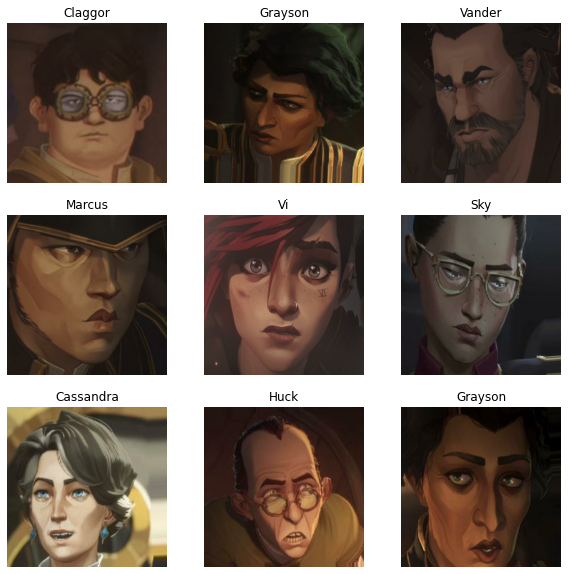

In [6]:
#Plot dataset sample
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Building CNN model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3,3), 2, activation='relu', padding = 'same',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 2, activation='relu', padding = 'same'))
model.add(Conv2D(128, (3,3), 2, activation='relu', padding = 'same'))
model.add(Conv2D(256, (3,3), 2, activation='relu', padding = 'same'))
model.add(Conv2D(512, (3,3), 2, activation='relu', padding = 'same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(28, activation='softmax'))

opt = Adam(learning_rate=0.0003, beta_1=0.5)
model.compile(optimizer  = opt, loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         295168    
                                                        

In [8]:
#Creating callback so training can be overviewed in tensorboard
#logdir should be changed accordingly
logdir='D:Ergasies/Tefas_pose/Tamvakis CNN/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/30
79/79 [==============================] - 18s 170ms/step - loss: 3.0260 - accuracy: 0.1422 - val_loss: 2.4378 - val_accuracy: 0.3071
Epoch 2/30
79/79 [==============================] - 6s 70ms/step - loss: 2.1114 - accuracy: 0.3921 - val_loss: 1.7648 - val_accuracy: 0.5143
Epoch 3/30
79/79 [==============================] - 6s 71ms/step - loss: 1.5657 - accuracy: 0.5366 - val_loss: 1.4187 - val_accuracy: 0.6041
Epoch 4/30
79/79 [==============================] - 6s 73ms/step - loss: 1.2329 - accuracy: 0.6388 - val_loss: 1.1714 - val_accuracy: 0.6799
Epoch 5/30
79/79 [==============================] - 6s 73ms/step - loss: 0.9553 - accuracy: 0.7224 - val_loss: 1.0374 - val_accuracy: 0.6938
Epoch 6/30
79/79 [==============================] - 6s 74ms/step - loss: 0.7582 - accuracy: 0.7782 - val_loss: 0.8757 - val_accuracy: 0.7632
Epoch 7/30
79/79 [==============================] - 6s 71ms/step - loss: 0.5827 - accuracy: 0.8317 - val_loss: 0.8208 - val_accuracy: 0.7937
Epoch 8/30


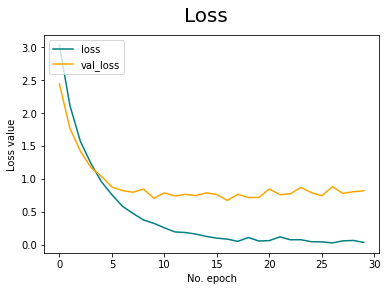

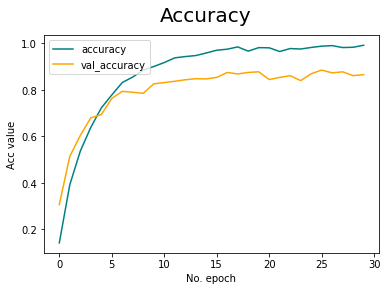

In [9]:
#Plotting the training and validation loss and accuracy plot

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.ylabel('Acc value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Saving model
model.save('D:Ergasies/Tefas_pose/Tamvakis CNN/Final model.h5')

This image is 99.80 percent Sevika and 0.20 percent Other.


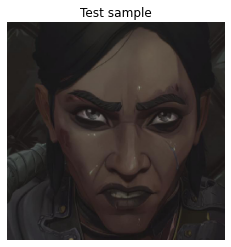

In [10]:
#Data dir should be changed accordingly
img = keras.preprocessing.image.load_img(
    'D:Ergasies/Tefas_pose/Tamvakis CNN/arcane_test/Sevika/img2321.jpg', target_size=image_size #testing on unknown image
)
plt.imshow(img)
plt.title("Test sample")
plt.axis("off")
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = np.amax(predictions[0])
index = np.argmax(predictions, axis = 1)
index = int(index)
print(
    f"This image is %.2f percent {class_names[index]} and %.2f percent Other."
    % (100 * (score), 100 * ((np.sum(predictions)) - score))
)